# 2024 計算語言學與語言理論期中考
##### Computational Linguistics and Linguistic Theories (mid-term exam)

> 自然語言：中文或英文；程式語言：python

> 18:00 之前上傳 colab 連結或 ipynb 檔案到 COOL。遲交者不計分。

## 第一題 (10%)

 ➡️ 在課本中第四章的式子 (4.14) 中，提到了 `Laplace` smoothing。請以 **markdown** 的語法，寫出這個式子，並解釋分母為何變成加 $|V|$。








### 回答
$$
\hat{P}(w_i|c)=\frac{count(w_i, c)+1}{\sum_{w\in V}(count(w, v)+1)}=\frac{count(w_i, c)+1}{(\sum_{w\in V}count(w, c))+|V|}
$$

為了避免有在其他class出現但在當前處理的class中未出現的word被賦值為0，於是將這種狀況賦值為1。$|V|$是從$\sum_{w\in V}1=|V|$被推導出來，因為add-one使所有的word types都加了1，分母加上$|V|$(union of all the word types)以保證當前class和word的所有組合機率總和等於1。

## 第二題 (20%)

 ➡️ 在課本中 3.9 小節中討論了 Perplexity 和 Entropy 的關聯。請用你理解的方式，重新摘要簡述 (rephrase) 一次。



### 回答
兩者皆是評估模型好壞的指標，perplexity的概念是模型平均需要從多少個可能的字詞中選擇出下一個詞；而entropy的概念是每個字詞所包含的資訊量。我們先來看看兩者的公式。

而entropy的公式為：
$$
H(W)=-\frac{1}{N}\log P(w_1w_2...w_N)
$$

再來我們從perplexity下手，將原本的公式換底：
$$
\begin{aligned}
perplexity(W)&=P(w_1w_2...w_N)^{-\frac{1}{N}}\\
&=2^{-\frac{1}{N}\sum_{i=1}^N\log(P(w_i|w_{i-1}, w_{i-2}, ..., w_1))}\\
&=2^{-\frac{1}{N}\log P(w_1w_2...w_N)}
\end{aligned}
$$

從這樣的角度來看，perplexity可以看作是對數機率的加權平均，進一步寫作

$$
Perplexity(W)=2^{H(W)}
$$

由此推導，我們可以知曉perplexity可以進而看作是模型的entropy

## 第三題 (50%)
##### 梯度下降在自然語言處理中的應用


在自然語言處理中，梯度下降（Gradient Descent）是一種廣泛使用的優化算法，用於最小化模型的損失函數，從而找到模型參數的最佳值。梯度下降通過計算損失函數對參數的梯度，並在梯度的反方向上調整參數值來進行優化。這一過程持續迭代，直到達到某個停止條件（如梯度接近0、達到最大迭代次數或損失低於某個閾值等）。


### 3.1 (20%)

 ➡️  假設你正在使用一個簡單的線性模型來預測基於詞向量的文本情感分析的結果。模型的損失函數是均方誤差（MSE），定義為：

$$ MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $$

其中 $n$ 是樣本數量，$y_i$ 是第 $i$ 個樣本的真實情感值，$\hat{y}_i $ 是模型預測的情感值，預測值 $\hat{y}$ 由下式給出：

$$  \hat{y}_i = wx_i + b  $$

其中 $w$ 是模型權重，$b$ 是偏差項，$ x_i $ 是第 $i$ 個樣本的詞向量。

1. **推導梯度下降更新公式**：給定上述模型和損失函數，推導應用梯度下降法更新 $w$ 和 $b$ 的公式。請展示完整的推導過程。

2. **應用情景分析**：在實際應用中，選擇學習率（learning rate）對梯度下降算法的性能有重要影響。請討論學習率過大和過小對模型訓練過程的可能影響，並提出如何選擇合適學習率的方法。

3. **擴展問題**：在某些情況下，標準梯度下降算法可能不是最佳選擇。請討論至少兩種梯度下降的變體（例如`Stochastic Gradient Descent`、`Mini-batch training` 等），並比較它們與標準梯度下降在計算效率和收斂速度方面的優缺點。

#### 注意

- 答題時請清晰地標示每一步的計算過程和推理邏輯。
- 對於第3小題的擴展問題，除了文字描述外，如果可能，請給出相關演算法的 pseudo code 以輔助解釋。


### 回答
1. <br>
首先將模型代入損失函數當中，得到MSE展開：
$$
\begin{aligned}
MSE&=\frac{1}{n}\sum_{i=1}^{n}(y_i-\hat{y}_i)^2\\
&=\frac{1}{n}\sum_{i=1}^{n}(y_i-(wx_i+b))^2
\end{aligned}
$$
接著分別計算$w$和$b$的偏微分：
- 對$w$的偏微分
$$
\begin{aligned}
\frac{\partial MSE}{\partial w}&=\frac{1}{n}\sum_{i=1}^{n}2(y_i-\hat{y}_i)\frac{\partial \hat{y}_i}{\partial w}\\
&=\frac{1}{n}\sum_{i=1}^{n}2(y_i-\hat{y}_i)(-x_i)
\end{aligned}
$$
- 對$b$的偏微分
$$
\begin{aligned}
\frac{\partial MSE}{\partial b}&=\frac{1}{n}\sum_{i=1}^{n}2(y_i-\hat{y}_i)\frac{∂\hat{y}_i}{\partial b}\\
&=\frac{1}{n}\sum_{i=1}^{n}2(y_i-\hat{y}_i)(-1)
\end{aligned}
$$
最後梯度下降要乘上learning rate，這邊使用$\alpha$表示，以此才能去接近MSE的極小值
$$
w:=w-\alpha\frac{\partial MSE}{\partial w}=w-\alpha\frac{1}{n}\sum_{i=1}^{n}2(y_i-\hat{y}_i)(-x_i)\\
b:=b-\alpha\frac{\partial MSE}{\partial w}=w-\alpha\frac{1}{n}\sum_{i=1}^{n}2(y_i-\hat{y}_i)(-1)
$$
2. <br>
我們可以將learning rate想象成在接近全域極小值過程中，每走一步所踏出的距離多寡，以下分成過大和過小兩個case來討論：
- learning rate過大：因為所踏出的每一步都太大了，無法向凸函數的谷底去逼近全域極小值，只能在周圍打轉；又或者是直接越過極小值而無法收斂。
- learning rate過小：還沒找到全域極小值在碰到局部極小值時，可能就會陷在這個區域打轉無法跳出；更新的速度太慢接近停滯。

  如果想要找到適當的learning rate，可以使用先設定一個較小的learning rate，觀察loss function的變化逐步增加數值來做調整。
3. <br>
- **Stochastic Gradient Descent**：每次更新參數時僅使用一個training data來計算梯度
  - 計算效率：因為只要計算單個樣本的梯度，所以計算上非常快
  - 收斂速度：因為每次更新都是根據單個樣本來決定方向和大小，所以收斂速度較快。但同時由於僅考慮單個樣本的梯度，受樣本的隨機性和noise影響很大，會造成收斂速度的不穩定。
- **Mini-batch Gradient Descent**：每次更新參數時僅使用一小批training data來計算梯度
  - 計算效率：計算量比SGD來得多，但比完全計算整個dataset還要少，是一個折衷的辦法
  - 收斂速率：比SGD有更充沛的資料特徵訊息，在更新方向和大小上會更穩定。因為降低隨機性的干擾，更新的方向不完全隨機，有助於跳出局部最小值。

### 3.2 (30%)

 ➡️ 使用 Naïve Bayes 模型和 TF-IDF 特徵對評論進行情感分析（正面或負面），並用梯度下降算法來優化一個簡單的線性回歸模型。

數據集：使用 `scikit-learn` 中的 `fetch_20newsgroups` 數據集作為例子，從中選取兩個類別作為正面和負面評論的代表。

- 步驟：

  - 載入和前處理數據。
  - 使用 TF-IDF 進行文本特徵提取。
  - 實作 NB 模型訓練情感分類器，並計算正確率(accuracy)。
  - 用梯度下降算法優化線性回歸模型。


⚠️⚠️ 請注意，梯度下降實作在實際應用中，特別是對於大規模數據集和複雜模型，我們通常使用更高級的優化算法和框架（如TensorFlow 或 PyTorch）來實現。這裡不需要使用框架。使用 `sklearn`即可。


In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split

# 選擇兩個類別作為正負評論
categories = ['alt.atheism', 'soc.religion.christian']
data = fetch_20newsgroups(subset='all', categories=categories)

# 分割數據集
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.25, random_state=42)


In [ ]:
# 文本特徵提取

from sklearn.feature_extraction.text import TfidfVectorizer

## your turn here
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

print("訓練集TF-IDF特徵矩陣形狀:", X_train_tfidf.shape)
print("測試集TF-IDF特徵矩陣形狀:", X_test_tfidf.shape)

訓練集TF-IDF特徵矩陣形狀: (1347, 22695)
測試集TF-IDF特徵矩陣形狀: (449, 22695)


In [ ]:
# NB classifier and evaluation (via accuracy)
## your turn here
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

classifier = MultinomialNB()
classifier.fit(X_train_tfidf, y_train)

y_pred = classifier.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9287305122494433


In [ ]:
# GD optimization

import numpy as np

#需考慮轉換預測值至類別標籤及準確率計算

## your turn here

from sklearn.linear_model import SGDClassifier

sgd_classifier = SGDClassifier(loss='log', max_iter=1000, tol=1e-3, random_state=42)
sgd_classifier.fit(X_train_tfidf, y_train)

y_pred_sgd = sgd_classifier.predict(X_test_tfidf)

accuracy_sgd = accuracy_score(y_test, y_pred_sgd)
print("Accuracy:", accuracy_sgd)

Accuracy: 0.9821826280623608


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


## 第四題 (20%)

請利用賽考利克泰雅語語料（`atayal.csv`）

➡️ 進行前處理

➡️ 為每個詞產生一組 fasttext word embeddings (via `gensim` FastText)







---


⚠️⚠️ 前處理：大寫轉小寫、以空格斷詞(tokenize)

⚠️⚠️ 泰雅語的`'`是聲門塞音 (glottal stop)，它會造成**語意差別** (e.g. kya' vs. kya)，前處理時需注意不可將它清除。

⚠️⚠️ 你的 output 需要包含：

- Fasttext word embedding matrix
    - 請使用下方設定的參數來 define model
    - 請輸出 **完整的 df**

---



In [ ]:
# Colab 環境設定 (參考用)

from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
# 調成自己存放檔案的路徑

import os
os.chdir('/content')

In [ ]:
import pandas as pd
import numpy as np
import re

In [ ]:
# read data
ata = pd.read_csv('./atayal-1.csv',encoding='utf-8',index_col=False).dropna()
ata[:5]


,text
0,Musa’ su ínu
1,Lokah su ga
2,Maniq la saku la
3,Musa ku qumah
4,Ima' lalú su ?


In [ ]:
texts = list(ata['text'])

In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
import re

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# Preprocessing: clean, tokenize，convert uppercase to lowercase
# 前處理：大寫轉小寫、以空格斷詞(tokenize)
## your turn here

# 去除多餘的問號，將大寫轉小寫
processed_data = [re.sub(r'\?', '', sentence).lower().split() for sentence in texts]

print(processed_data)

[['musa’', 'su', 'ínu'], ['lokah', 'su', 'ga'], ['maniq', 'la', 'saku', 'la'], ['musa', 'ku', 'qumah'], ["ima'", 'lalú', 'su'], ['ta', 'su', 'kin', 'zíboq'], ['sgaya', 'ta’', 'la'], ['pkita', 'ta', 'tai', 'spayat', 'ryax', 'sa', 'rehay', 'enial'], ['pkita', 'ta', 'lozi', 'ki'], ['cyux', 'maki', 'la', 'sa', 'ngasal', 'mu'], ['cisal', 'ta', 'cikay', 'lao'], ['mincisal', 'ta', 'sraral', 'wa'], ['pucing', 'seqani', 'ke', 'maku'], ['mhway', 'su', 'balay'], ['cyux', 'si', 'ngyaw', 'ngyaw'], ['nalu', 'wahán', 'su'], ['uzyay', 'ktul', 'mu'], ['m’uzyay', 'sa', 'qu', 'la'], ['cyux', 'tmutu', 'ruma', 'i', "yaba'", 'maku.'], ['‘ngraowi', 'ki!'], ['pyaray', 'misu', 'laki', 'ha'], ['pyaray', 'misu', 'lai'], ['salu’', 'roziq', 'su', 'ka'], ['cyux', '‘pxan', 'btunu', 'ku', 'qba’', 'nya', 'la'], ['yugaw', 'mu', 'cikay', 'ku', 'lukusumu'], ['abi’', 'saku', 'cikay', 'ha'], ['pqutay', 'misu', 'cikay', 'ha'], ['nyux', 'm’unu', 'la'], ['musa’', 'ku', 'mzyup', 'qsya’'], ['bhyun', 'mu', '‘laqi', 'qani'], ['ky

In [ ]:
# Build Fasttext model
from gensim.models import FastText

In [ ]:
# define fastText model

ft_model = FastText(vector_size = 7,
                    window = 5,
                    min_count = 3,
                    workers = 4,
                    batch_words = 10000)


In [ ]:
ft_model.build_vocab(processed_data)
ft_model.train(processed_data, total_examples=ft_model.corpus_count, epochs=10)

(716, 5100)

In [ ]:
ft_model.save("./ft.model")
# model = FastText.load("ft.model")

In [ ]:
import pandas as pd

# 提取模型的詞彙
words = ft_model.wv.index_to_key

# 創建 DataFrame
word_vectors_df = pd.DataFrame(columns=range(ft_model.vector_size), index=words)

# 填充 DataFrame
for word in words:
    word_vectors_df.loc[word] = ft_model.wv[word]

# 顯示 DataFrame
word_vectors_df

,0,1,2,3,4,5,6
ku,-0.076593,0.005322,-0.059898,0.029453,-0.06996,-0.030523,0.047129
qani,-0.039874,-0.021475,-0.019247,-0.00012,-0.050682,-0.041106,0.010201
la,-0.064388,-0.00023,0.074152,0.028948,-0.034348,-0.11233,0.082289
su,0.022639,0.05391,0.000184,0.056095,-0.068855,-0.027074,-0.062862
‘laqi,-0.036208,0.01436,0.024961,0.009386,0.017829,-0.012369,0.010183
cyux,0.009867,0.018402,-0.034094,-0.02368,-0.013566,-0.026448,0.051927
mu,-0.018897,-0.007543,-0.047072,0.037309,-0.019421,0.047243,0.005832
minqutux,0.045109,0.005823,0.011951,-0.006956,0.024225,0.017011,-0.001997
nya,-0.046021,-0.019567,-0.02885,0.034227,0.005695,-0.054993,0.030629
wal,0.009798,0.033482,-0.014584,0.007212,-0.004831,-0.036753,0.001555


### 範例表

In [ ]:
# 範例 vec_matrix
## index 為 word，欄位數為 7
vec_matrix

,0,1,2,3,4,5,6
ku,-0.115770,0.025958,-0.067264,0.046410,-0.105158,-0.047355,0.079325
qani,-0.068894,-0.006703,-0.024042,0.012224,-0.075306,-0.053959,0.033400
la,-0.084319,0.009206,0.070063,0.037932,-0.052021,-0.120436,0.099320
su,0.012108,0.058678,-0.002128,0.060938,-0.078057,-0.031320,-0.054476
‘laqi,-0.063470,0.027106,0.020641,0.020851,-0.005209,-0.024984,0.032223
cyux,-0.028563,0.038145,-0.040784,-0.007441,-0.048231,-0.040029,0.083998
mu,-0.046435,0.004332,-0.051463,0.048189,-0.043441,0.038659,0.028208
minqutux,0.021384,0.017659,0.008521,0.003456,0.002833,0.005821,0.016415
nya,-0.072402,-0.007249,-0.032832,0.045717,-0.015992,-0.065354,0.052130
wal,-0.018603,0.048331,-0.020139,0.019652,-0.029920,-0.047697,0.024399


## 加分題 (bonus, 30%)

> 可以回家寫，下週上課繳交。

### 加分題 1

➡️ (15%) 使用 [K-means clustering](https://www.wikiwand.com/en/K-means_clustering) 進行詞彙分類及畫圖（可以自行決定 cluster 的數量以及降維方式）

   - 請以 scatter plot 呈現，每個 cluster 以**不同顏色**標記
   - 每一點需標上**對應詞彙**的文字
   - 描述並分析你在詞彙 cluster plot 觀察到的現象。例如描述並分析圖中每個 cluster 包含哪些詞彙、這些詞彙有沒有語意關聯等等 ...（請使用以下所附的參考資源）




In [53]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

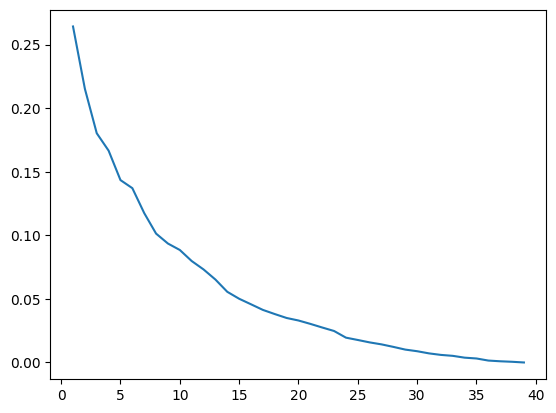

In [45]:
# 找出最佳分群數
DistanceList = []
for i in range(1,40):
    KM = KMeans(n_clusters=i, n_init='auto', random_state=1)
    KM.fit(word_vectors_df)
    DistanceList.append(KM.inertia_)
plt.plot(range(1,40), DistanceList)
plt.show()

In [69]:
# K-means clustering
kmeans = KMeans(n_clusters=3, random_state=1)
clusters = kmeans.fit_predict(word_vectors_df)

# 使用 PCA 降維
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(word_vectors_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<ipython-input-77-41b498edd214>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark')


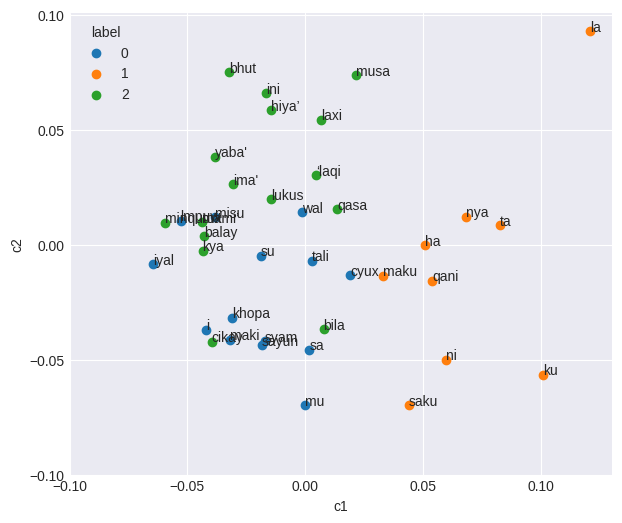

In [77]:
plt.figure(figsize=(7, 6))
plt.style.use('seaborn-dark')

for i in range(3):
    plt.scatter(reduced_data[clusters == i, 0], reduced_data[clusters == i, 1], label=i)

for i, word in enumerate(word_vectors_df.index):
    plt.text(reduced_data[i, 0], reduced_data[i, 1], word)

plt.xlabel('c1')
plt.ylabel('c2')
plt.legend(title='label')
plt.grid(True)

plt.xticks(np.linspace(-0.1, 0.1, 5))
plt.yticks(np.linspace(-0.1, 0.1, 5))

plt.show()

從以上圖表我們可以將詞彙大致分為三類：
- label 0: su, cyux, mu, wal, lmpuw, i, iyal, khopa, maki, syam, misu, sa, sayun, tali
- label 1: ku, qani, la, nya, maku, saku, ta, ha, ni
- label 2: ‘laqi, minqutux, qasa, cikay, lukus, bhut, yaba', balay, hiya’, kya, ima', laxi, musa, ini, bila, mami’

label 0為基本詞彙，如動詞（來、看、步行）、名詞（魚、水、我）、形容詞（大、細、紅色）、以及時間詞（早上、很多）。<br>
label 1為一些代詞和屬性詞，如人稱代詞（你的、他的、我們的）和動詞（看見）。<br>
label 2為地點相關的詞彙，如自然景觀（山、河、森林）、建築物（房子）、材料（石頭、木）、方位詞（在這裡、這裡）、以及形容詞（高的、小、多、綠的）

### 範例圖

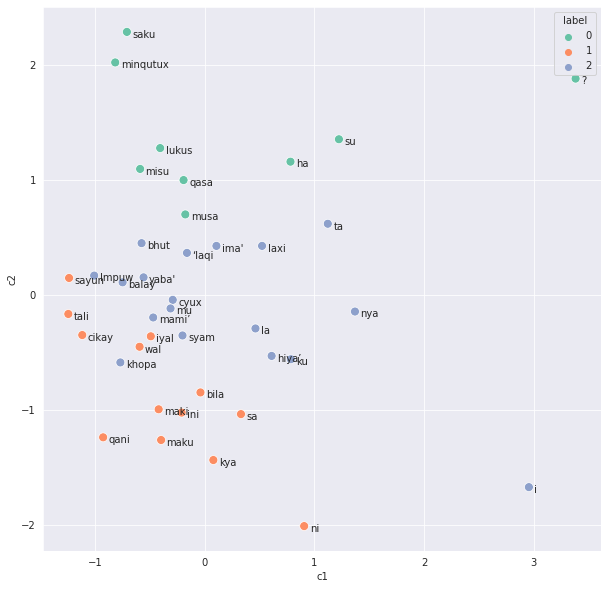

In [ ]:
# 範例 scatter plot

### 加分題2  
➡️ (15%)    
  
> t-SNE（t-distributed Stochastic Neighbor Embedding）和 UMAP（Uniform Manifold Approximation and Projection）都是降維技術，廣泛應用於高維數據的視覺化。它們能夠將高維數據點映射到低維空間（通常是二維或三維），以便於視覺化和分析。

➡️ 研究一下對於前面的數據使用 `t-SNE` 與 `UMAP` 視覺化，做個比較，給出你的觀察與想法。

In [89]:
from sklearn.manifold import TSNE
import umap.umap_ as umap

In [90]:
# 使用 t-SNE 降維
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(word_vectors_df)

In [92]:
# 使用 UMAP 降維
umap_result = umap.UMAP(n_components=2, random_state=42).fit_transform(word_vectors_df)

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


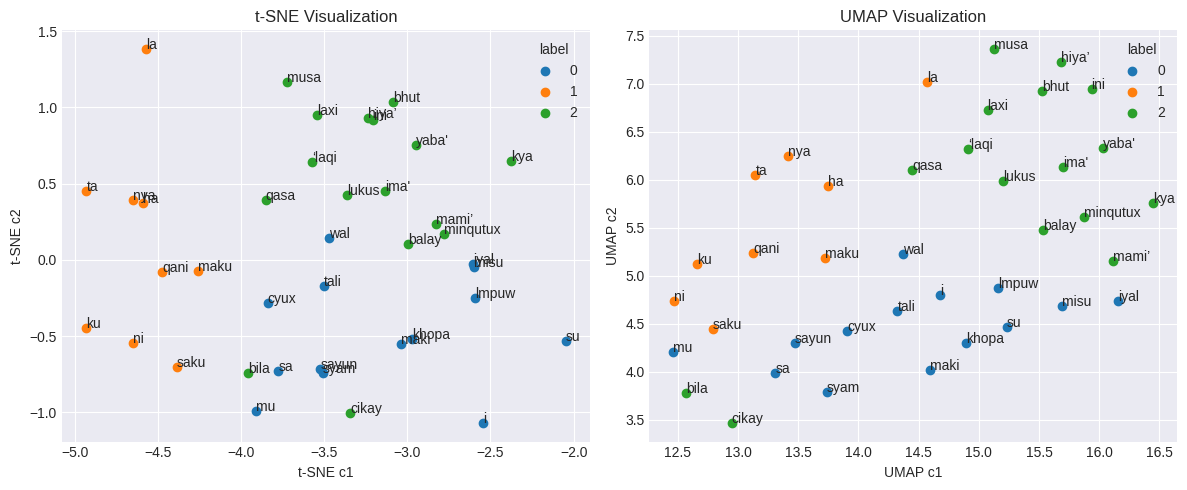

In [100]:
# 繪製 t-SNE 圖
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
for i in range(3):
    plt.scatter(tsne_result[clusters == i, 0], tsne_result[clusters == i, 1], label=i)
for i, word in enumerate(word_vectors_df.index):
    plt.text(tsne_result[i, 0], tsne_result[i, 1], word)
plt.title('t-SNE Visualization')
plt.xlabel('t-SNE c1')
plt.ylabel('t-SNE c2')
plt.legend(title='label')
plt.grid(True)

# 繪製 UMAP 圖
plt.subplot(1, 2, 2)
for i in range(3):
    plt.scatter(umap_result[clusters == i, 0], umap_result[clusters == i, 1], label=i)
for i, word in enumerate(word_vectors_df.index):
    plt.text(umap_result[i, 0], umap_result[i, 1], word)
plt.title('UMAP Visualization')
plt.xlabel('UMAP c1')
plt.ylabel('UMAP c2')
plt.legend(title='label')
plt.grid(True)

plt.tight_layout()
plt.show()

t-SNE和UMAP的差異如下：
1. **計算方法**：
   - t-SNE通常是基於normal distribution來描述數據之間的相似性，並優化KL散度來minimize原始空間和降維空間之間的差異。
   - UMAP則通過優化嵌入空間的拓撲結構來保持局部和全局的數據相似性，它使用了一種基於局部連通性的建模方法。

2. **可擴展性**：
   - UMAP在大型數據集上通常比t-SNE更具可擴展性，因為它在計算效率方面較高。

3. **保持全局結構**：
   - UMAP在保持全局結構方面通常比t-SNE更優秀，它能夠更好地保持數據之間的全局相似性。

# 參考

- [Colab Markdown Guide](https://colab.research.google.com/notebooks/markdown_guide.ipynb#scrollTo=Lhfnlq1Surtk)

- 分析泰雅語相關資源：[原住民族語言線上辭典](https://e-dictionary.ilrdf.org.tw/tay/search.htm)、[族語e樂園](https://web.klokah.tw/multiSearch/)
